In [1]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
TOKEN='github_pat_'
!git clone https://$TOKEN@github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 173 (delta 12), reused 13 (delta 6), pack-reused 144
Receiving objects: 100% (173/173), 624.06 KiB | 1.74 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [2]:
%cd /content/NaiveNeuralNetwork

/content/NaiveNeuralNetwork


In [3]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git add nnn.py visualiser.py

In [ ]:
!git commit -m "add __repr__"

[main a8b02ff] add __repr__
 1 file changed, 22 insertions(+), 4 deletions(-)


In [ ]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 621 bytes | 621.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romenlaw/NaiveNeuralNetwork
   7722c7d..a8b02ff  main -> main


## housekeeping

In [4]:
import sys
sys.path.append('/content/NaiveNeuralNetwork')

%load_ext autoreload
%autoreload 2

In [5]:
from nnn import *
from visualiser import *

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (5,3)

###  Multi-class Classifier Demo

In [7]:
np.random.seed(1337)
random.seed(1337)

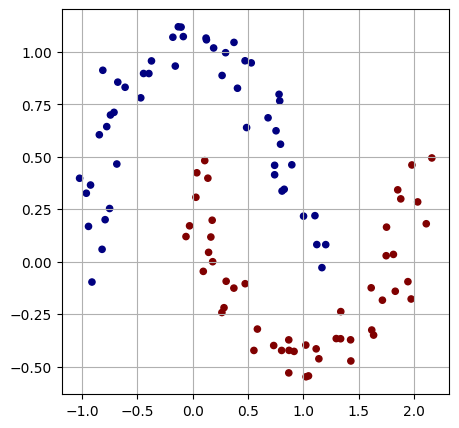

In [8]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [17]:
X.shape, y.shape, y, X

((100, 2),
 (100,),
 array([-1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,
         1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
         1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
         1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
         1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1]),
 array([[ 1.12211461e+00,  8.14771734e-02],
        [-8.18829413e-01,  5.87900639e-02],
        [ 1.61370966e+00, -1.24645900e-01],
        [-9.23009184e-01,  3.65228899e-01],
        [ 1.43851462e-01,  4.43800492e-02],
        [ 1.64472466e-01,  1.17383457e-01],
        [ 1.33877062e+00, -2.38009933e-01],
        [ 8.71148615e-01, -4.22717587e-01],
        [ 1.83129946e+00, -1.41043828e-01],
        [ 4.87571202e-01,  6.39092830e-01],
        [ 3.74623511e-02,  4.23588090e-01],
        [-4.43916853e-01,  8.96739312e-01],
  

In [9]:
# initialize a model
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP[nin=2, n_layers=3]: [
 Layer[0,2 x 16, non_linear=True]: [Neuron[L0,0,non_linear=True], Neuron[L0,1,non_linear=True], Neuron[L0,2,non_linear=True], Neuron[L0,3,non_linear=True], Neuron[L0,4,non_linear=True], Neuron[L0,5,non_linear=True], Neuron[L0,6,non_linear=True], Neuron[L0,7,non_linear=True], Neuron[L0,8,non_linear=True], Neuron[L0,9,non_linear=True], Neuron[L0,10,non_linear=True], Neuron[L0,11,non_linear=True], Neuron[L0,12,non_linear=True], Neuron[L0,13,non_linear=True], Neuron[L0,14,non_linear=True], Neuron[L0,15,non_linear=True]], 
 Layer[1,16 x 16, non_linear=True]: [Neuron[L1,0,non_linear=True], Neuron[L1,1,non_linear=True], Neuron[L1,2,non_linear=True], Neuron[L1,3,non_linear=True], Neuron[L1,4,non_linear=True], Neuron[L1,5,non_linear=True], Neuron[L1,6,non_linear=True], Neuron[L1,7,non_linear=True], Neuron[L1,8,non_linear=True], Neuron[L1,9,non_linear=True], Neuron[L1,10,non_linear=True], Neuron[L1,11,non_linear=True], Neuron[L1,12,non_linear=True], Neuron[L1,13,non_lin

## SVM - Weston Watkins 1999
$$L_i = \sum_{j \ne y_i} max(0, s_j - s_{y_i} + 1)
$$
where $i \in$ [0, batch size), $j \in$ [0, number of output classes)

The loss function
$$L = \dfrac{1}{N}\sum_{i=0}^{batch\_size}{L_i}$$

## Structured SVM
$$L_i = \max(0, \max(s_j)-s_{y_i}+1), \forall j\ne y_i$$

where $i \in$ [1, batch size], $j \in$ [1, number of output classes],
$s_j$ is the predicted score, $s_{y_i}$ is ground truth score for $i$th sample

The loss function
$$L = \dfrac{1}{N}\sum_{i=i}^{N}{L_i}$$

where $N$ is batch size

In [10]:
# loss function
def loss(batch_size=None):

    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Scalar, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

: 0.8659503415705121 0.68


In [11]:
# optimization
for k in range(100):

    # forward
    total_loss, acc = loss()

    # backward
    model.zero_grad()
    total_loss.backward()

    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 0.8659503415705121, accuracy 68.0%
step 1 loss 1.5440922160314283, accuracy 50.0%
step 2 loss 0.9460449078546274, accuracy 75.0%
step 3 loss 0.4030720815560562, accuracy 83.0%
step 4 loss 0.3842886682393768, accuracy 84.0%
step 5 loss 0.4005178287080058, accuracy 85.0%
step 6 loss 0.28995121978014066, accuracy 88.0%
step 7 loss 0.2772399391711312, accuracy 90.0%
step 8 loss 0.2603441927730051, accuracy 89.0%
step 9 loss 0.30946592954041413, accuracy 89.0%
step 10 loss 0.22794829029928027, accuracy 91.0%
step 11 loss 0.28746107205156596, accuracy 93.0%
step 12 loss 0.4504850616792608, accuracy 86.0%
step 13 loss 0.29342271969861206, accuracy 88.0%
step 14 loss 0.16522563479605332, accuracy 94.0%
step 15 loss 0.1403453348031809, accuracy 95.0%
step 16 loss 0.12849646961474182, accuracy 96.0%
step 17 loss 0.13221539864229082, accuracy 95.0%
step 18 loss 0.21730992969985133, accuracy 92.0%
step 19 loss 0.35122926511113567, accuracy 89.0%
step 20 loss 0.23995160361693613, accura

(-1.548639298268643, 1.951360701731357)

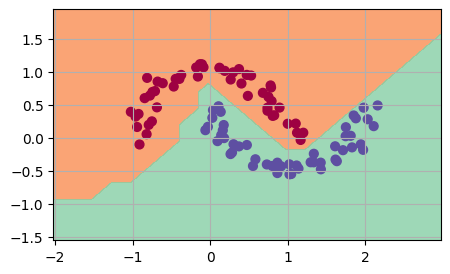

In [14]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Scalar, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
